# **금융 거래 고객 신용 위험 예측하기**

In [1]:
#구글 드라이브에 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


출처: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)



*   Age: 나이
*   Sex: 성별
*   Job: 직업
*   Housing: 주택 소유
*   Saving accounts: 예금 계좌 현황
*   Checking account: 당좌 계좌 현황
*   Credit amount: 채권 금액
*   Duration: 기간
*   Purpose: 목적
*   Risk: 위험도




---



## 1. 데이터 읽기

In [8]:
# 필요한 모듈 삽입
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/credit_risk/data/german_credit_data.csv')
display(df.head(2),df.tail(2))

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [5]:
# column명 확인 
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [7]:
# 데이터프레임 정보 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [9]:
# 수치형 변수의 데이터 정보를 요약하여 출력
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000




---



## 2. 데이터 정제

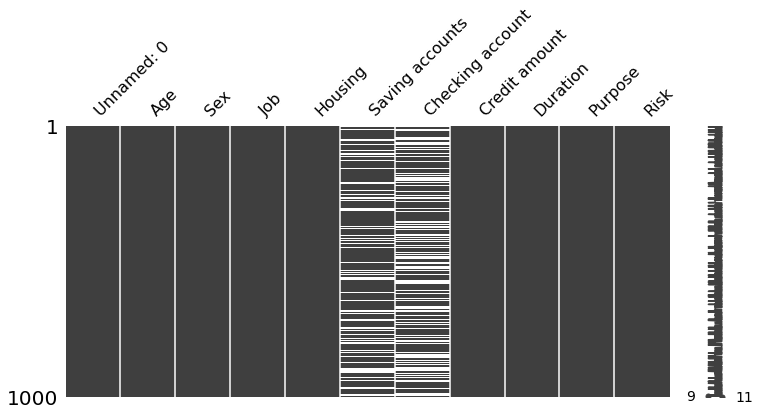

In [10]:
# 결측값 시각화하기 => missingno 사용 
msno.matrix(df, figsize=(12,5)) 

In [12]:
# 결측값 정보를 출력
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

**일반적으로 사용하는 결측값 삭제 방법을 사용하지만, 1000개 뿐이 없는 데이터이기에 결측값을 아래와 같이 대체하는 방법도 있다.**



In [15]:
# 'Saving accounts' ,'Checking account' 변수에 있는 결측값을 `Others`로 대체 =>  fillna함수 사용
#  df_clean이라는 변수로 저장
df_clean = df
df_clean['Saving accounts'] = df['Saving accounts'].fillna('Others')
df_clean['Checking account'] = df['Checking account'].fillna('Others')
df_clean.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64



---



## 3. 데이터 시각화

**범주형 데이터**

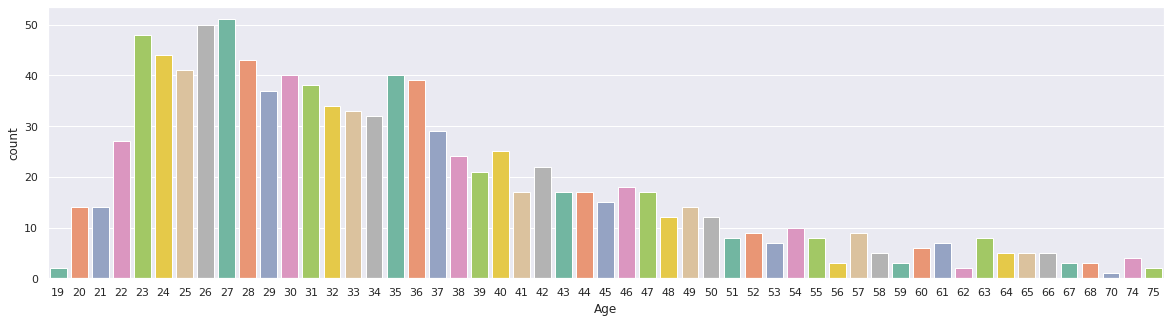

In [16]:
# Age 시각화

plt.figure(figsize=(20,5))
sns.set(style='darkgrid')
ax = sns.countplot(x='Age', data=df_clean, palette="Set2")

male      690
female    310
Name: Sex, dtype: int64

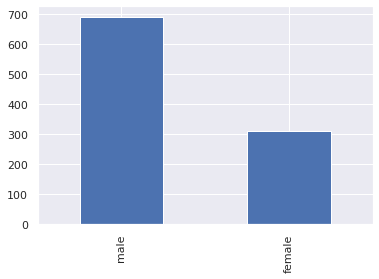

In [19]:
# Sex 시각화
df_clean['Sex'].value_counts().plot(kind='bar')
df_clean['Sex'].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

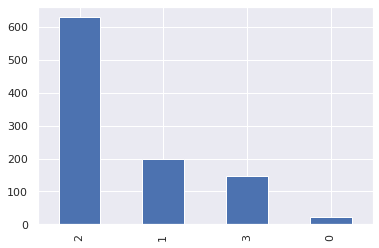

In [20]:
# Job 시각화
df_clean['Job'].value_counts().plot(kind='bar')
df_clean['Job'].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

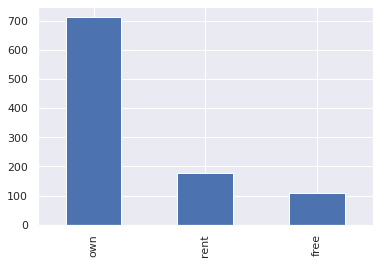

In [21]:
# Housing 시각화
df_clean['Housing'].value_counts().plot(kind='bar')
df_clean['Housing'].value_counts()

little        603
Others        183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

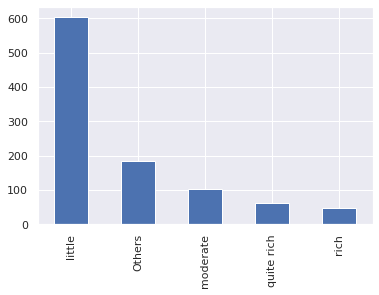

In [22]:
# Saving accounts 시각화
df_clean['Saving accounts'].value_counts().plot(kind='bar')
df_clean['Saving accounts'].value_counts()

Others      394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

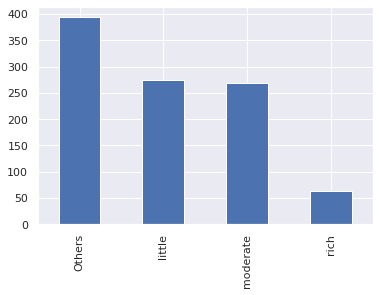

In [23]:
# Checking account 시각화
df_clean['Checking account'].value_counts().plot(kind='bar')
df_clean['Checking account'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

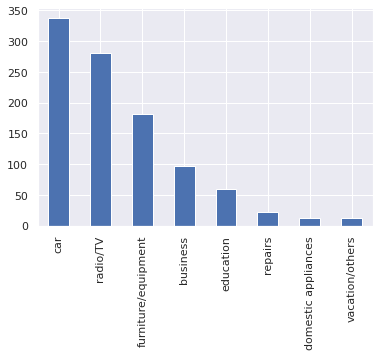

In [27]:
# Purpose 시각화
df_clean['Purpose'].value_counts().plot(kind='bar')
df_clean['Purpose'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

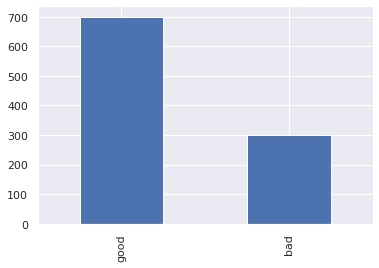

In [28]:
# Risk 시각화 
df_clean['Risk'].value_counts().plot(kind='bar')
df_clean['Risk'].value_counts()

**수치형 데이터**

{'boxes': [<matplotlib.lines.Line2D at 0x7fd45714ad10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd457165510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd45716d550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd457165f90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd457160a10>,
  <matplotlib.lines.Line2D at 0x7fd457160f90>]}

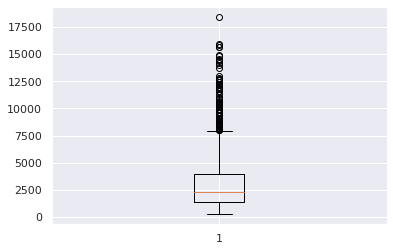

In [25]:
# Credit amount 시각화
# 수치형 데이터는 boxplot으로 분포를 출력
plt.boxplot(df_clean['Credit amount'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fd457080750>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd457093f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd45709bf50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd45709b9d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd457093450>,
  <matplotlib.lines.Line2D at 0x7fd4570939d0>]}

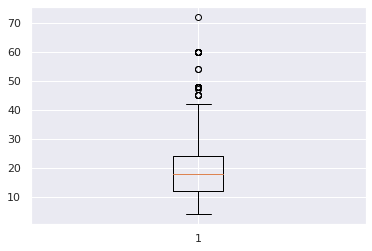

In [26]:
# Duration 시각화
plt.boxplot(df_clean['Duration'])

# **4. Risk 데이터를 이용하여 위험도 시각화하기**

In [29]:
def multiplot(columns):
    df_multi = pd.DataFrame({'ALL': df_clean[columns].value_counts().sort_index().values,
                          'good': df_clean[df_clean['Risk']=='good'][columns].value_counts().sort_index().values,
                          'bad': df_clean[df_clean['Risk']=='bad'][columns].value_counts().sort_index().values
                          }, index=df_clean[columns].value_counts().sort_index().index)

    df_multi.plot(kind='bar')
    plt.legend(title='Risk')
    plt.show()

Text(0.5, 1.0, '(6) Risk & Purpose')

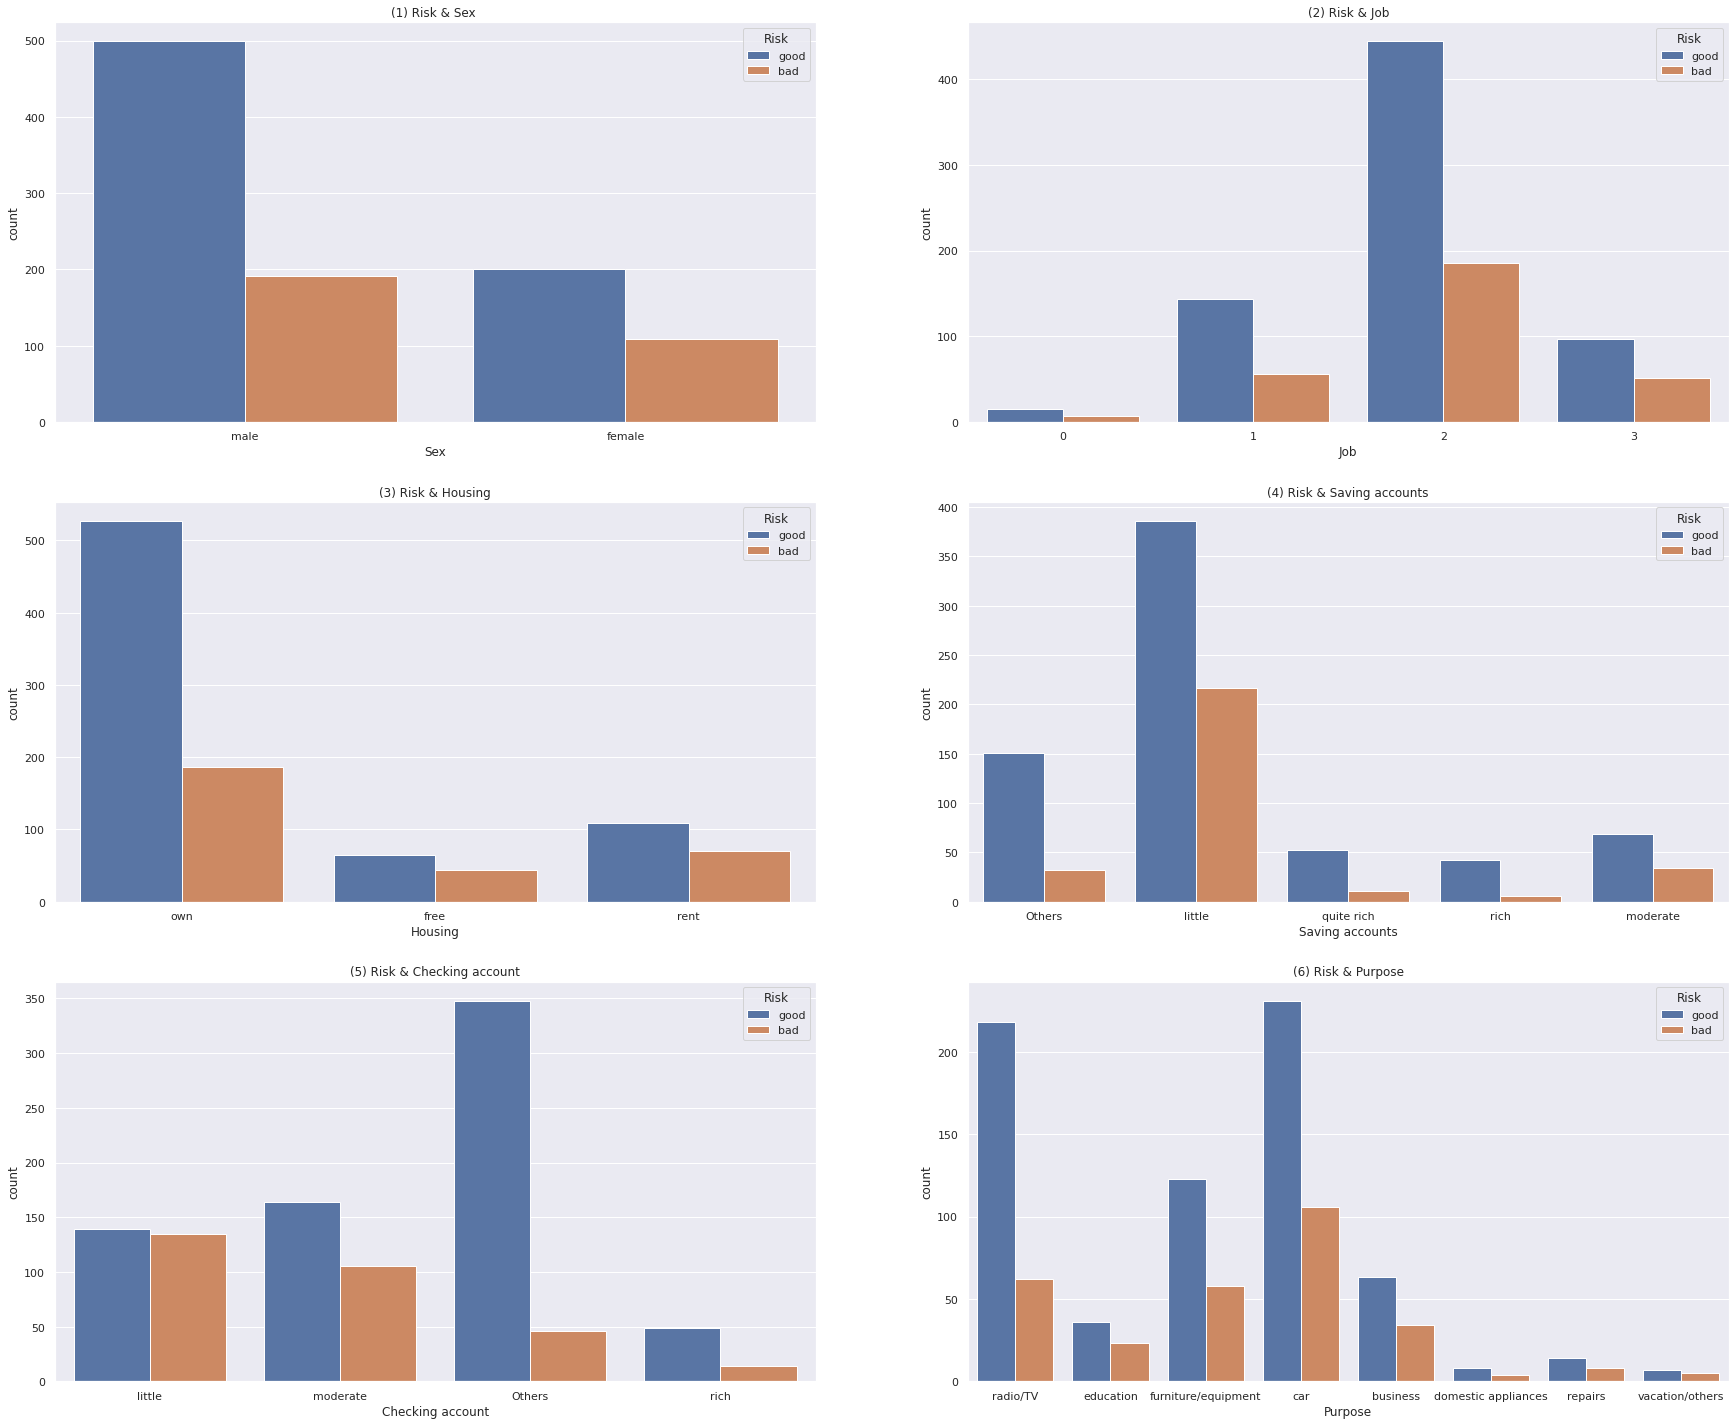

In [36]:
f,ax=plt.subplots(3,2,figsize=(30,25))
sns.countplot('Sex', data=df_clean , hue='Risk', ax=ax[0,0])
ax[0,0].set_title('(1) Risk & Sex ')
sns.countplot('Job', data=df_clean , hue='Risk', ax=ax[0,1])
ax[0,1].set_title('(2) Risk & Job')
sns.countplot('Housing', data=df_clean , hue='Risk', ax=ax[1,0])
ax[1,0].set_title('(3) Risk & Housing')
sns.countplot('Saving accounts', data=df_clean , hue='Risk', ax=ax[1,1])
ax[1,1].set_title('(4) Risk & Saving accounts')
sns.countplot('Checking account', data=df_clean , hue='Risk', ax=ax[2,0])
ax[2,0].set_title('(5) Risk & Checking account')
sns.countplot('Purpose', data=df_clean , hue='Risk', ax=ax[2,1])
ax[2,1].set_title('(6) Risk & Purpose')



---



# **5. 데이터 전처리**

일반적인 머신러닝 모델에서는 수치 자료형만을 입력값으로 사용한다. <br/>
하지만, 신용 예측을 위한 데이터에 존재하는 Housing, Sex. Job과 같은 object 자료형은 매우 중요한 정보이다. 

그러므로, object 자료형을 수치 자료형으로 변환하는 dummy 방식을 사용해야 한다.

In [38]:
# 2개의 카테고리를 갖는 'Risk' 데이터는 replace를 사용하여 0,1로 변환.
df_clean = df_clean.replace(['good','bad'],[0,1])

# object 자료형 데이터의 변수를 정리.
obj_features = ['Sex','Housing', 'Saving accounts', 'Checking account','Purpose']

# 수치 자료형 데이터의 변수를 정리.
num_features=['Age', 'Job', 'Credit amount', 'Duration','Risk']

# dummy 방식을 사용하기 위하여 변환
for variable in obj_features:
    # pandas의 더미 방식을 사용하여 object 자료형 데이터를 변환한 dataframe을 생성
    dummies = pd.get_dummies(df_clean[obj_features])
    # 기존 수치형 데이터에 더미로 새로 생성된 데이터를 추가
    df1= pd.concat([df_clean[num_features], dummies],axis=1)

df1

,Age,Job,Credit amount,Duration,Risk,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_Others,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_Others,Checking account_little,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
996,40,3,3857,30,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
997,38,2,804,12,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
998,23,2,1845,45,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [39]:
# 예측해야 할 변수인 `Risk`를 제거하여 머신러닝 입력값인 x에 저장
x = df1.drop(columns=['Risk']).to_numpy()

In [41]:
# 예측해야 할 변수 `Risk`만을 선택하여 numpy 형태로 y에 저장
y = df_clean['Risk']
y = y.to_numpy().ravel() # 1 차원 벡터 형태로 출력하기 위해 ravel 사용
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

# **6. 머신러닝**

**머신러닝의 성능을 평가 하기 위해서는 전체 데이터를 학습에 사용하지 않고 학습용 데이터와 테스트용 데이터를 나누어 사용한다.**

In [42]:
# sklearn에서 제공하는 train_test_split을 사용
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**머신러닝 모델 학습**

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = []
models.append(('LR', LogisticRegression(max_iter =5000))) # 로지스틱 분류기
models.append(('NB', GaussianNB()))  # 가우시안 나이브 베이즈 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델
models.append(('DT', DecisionTreeClassifier()))

for name, model in models:
    model.fit(x_train, y_train)
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
    print(msg)

LR - train_score : 0.737500, test score : 0.735000
NB - train_score : 0.715000, test score : 0.715000
SVM - train_score : 0.992500, test score : 0.710000
DT - train_score : 1.000000, test score : 0.655000


**다층 퍼셉트론(Multilayer Perceptron)를 사용한 딥러닝 모델 학습**

In [44]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input, optimizers
from tensorflow.keras.layers import Dense, Dropout

tf.random.set_seed(2021)

mlp_model = Sequential()
mlp_model.add(Input(x_train.shape[1]))
mlp_model.add(Dense(300, activation='relu'))
mlp_model.add(Dense(10, activation='relu'))
mlp_model.add(Dense(2, activation='softmax'))

# optimizer, loss, metrics 설정
mlp_model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 모델 훈련
mlp_model.fit(x_train, y_train, epochs=1000, batch_size=100)

_, train_accuracy = mlp_model.evaluate(x_train, y_train)
_, test_accuracy = mlp_model.evaluate(x_test, y_test)
print('Train accuracy: {:.6f}, Test accuracy: {:.6f}'.format(train_accuracy, test_accuracy))

Epoch 1/1000
8/8 [==============================] - 1s 3ms/step - loss: 29517.4941 - accuracy: 0.6187
Epoch 2/1000
8/8 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.6975
Epoch 3/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.6975
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 0.6683 - accuracy: 0.6975
Epoch 5/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6624 - accuracy: 0.6975
Epoch 6/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6572 - accuracy: 0.6975
Epoch 7/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6525 - accuracy: 0.6975
Epoch 8/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.6975
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6445 - accuracy: 0.6975
Epoch 10/1000
8/8 [==============================] - 0s 3ms/step - loss: 0.6412 - accuracy: 0.6975
Epoch 11/1000
8

# **7. 평가 및 예측**

In [48]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# MLP 모델의 confusion matrix를 사용하기 위하여 테스트 데이터의 예측값을 저장.
mlp_prediction = mlp_model.predict(x_test)
mlp_prediction = np.argmax(mlp_prediction, axis=1)

# sklearn에서 제공하는 recall_score, precision_score를 사용하여 recall과 precision 결과물을 출력.
print("Recall score: {}".format(recall_score(y_test, mlp_prediction)))
print("Precision score: {}".format(precision_score(y_test, mlp_prediction)))

Recall score: 0.0
Precision score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# 0번부터 9번까지 10개를 출력.
for i in range(10): 
    print("{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터: {}".format(i, mlp_prediction[i], y_test[i]))

0 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
1 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
2 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
3 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
4 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
5 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
6 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
7 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
8 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 0
9 번째 테스트 데이터의 예측 결과: 0, 실제 데이터: 1
